## Importações e Carregamento dos Dados

In [1]:
%pip install -q numpy -q scikit-learn -q matplotlib -q seaborn -q shap

Note: you may need to restart the kernel to use updated packages.


Neste bloco, importamos todas as bibliotecas necessárias e carregamos os dados de treino e teste. Também exibimos informações básicas sobre o dataset de treino.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from utils.functions import *
import warnings
warnings.filterwarnings('ignore')

In [3]:
try:
    df = pd.read_parquet('data/train.parquet')
    test = pd.read_parquet('data/test.parquet')
except FileNotFoundError:
    print("Erro: Arquivos de dados não encontrados. Verifique se os arquivos estão no diretório correto.")
    exit()

print("Informações do Dataset:")
print(df.info())

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152038 entries, 0 to 152037
Data columns (total 62 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      151333 non-null  float64
 1   x1      152037 non-null  float64
 2   x2      152037 non-null  float64
 3   x3      71762 non-null   float64
 4   x4      152037 non-null  float64
 5   x5      152037 non-null  float64
 6   x6      146648 non-null  float64
 7   x7      152037 non-null  float64
 8   x8      149891 non-null  float64
 9   x9      147583 non-null  float64
 10  x10     151937 non-null  float64
 11  x11     71762 non-null   float64
 12  x12     151333 non-null  float64
 13  x13     151937 non-null  float64
 14  x14     152037 non-null  float64
 15  x15     149943 non-null  float64
 16  x16     71762 non-null   float64
 17  x17     152037 non-null  float64
 18  x18     146412 non-null  float64
 19  x19     151333 non-null  float64
 20  x20     151876 non-null 

## Criação de Amostra e Análise Inicial

Aqui, criamos uma amostra com 10% dos dados de cada classe para análises iniciais. Exibimos a distribuição das classes na amostra e criamos uma matriz de correlação para visualizar as relações entre as variáveis.


Tamanho da amostra: 15204
Distribuição das classes na amostra:
y
1    0.856222
0    0.143778
Name: proportion, dtype: float64


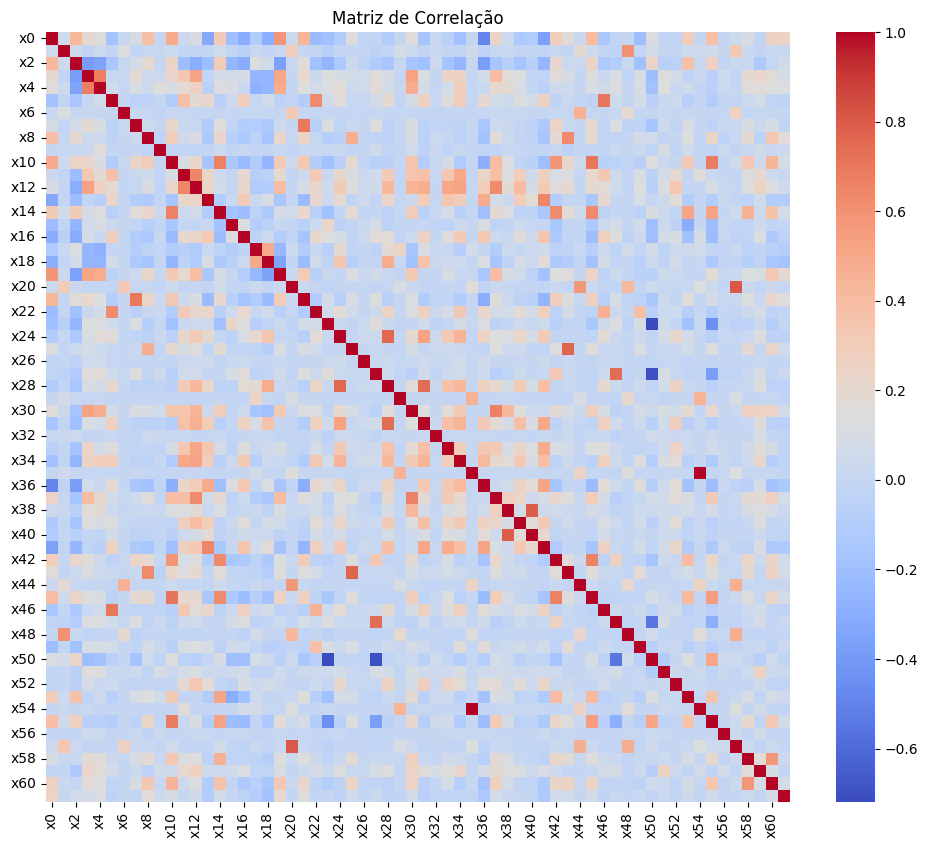

In [4]:
amostra = criar_amostra(df)

print("\nTamanho da amostra:", len(amostra))
print("Distribuição das classes na amostra:")
print(amostra['y'].value_counts(normalize=True))

corr_matrix = amostra.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()
plt.close()

In [5]:
estrategias = ['media', 'mediana', 'moda', 'constante']
dfs_tratados = {estrategia: tratar_nulos(amostra, estrategia) for estrategia in estrategias}

for estrategia, df_tratado in dfs_tratados.items():
    print(f"\nEstatísticas após tratamento com {estrategia}:")
    print(df_tratado.describe())


Estatísticas após tratamento com media:
                 x0            x1            x2            x3            x4  \
count  15204.000000  1.520400e+04  15204.000000  15204.000000  15204.000000   
mean       0.654201  1.122934e-03      0.193146      0.066293      0.164541   
std        0.253283  1.082835e-02      0.194416      0.052186      0.122493   
min        0.000000  0.000000e+00      0.000000      0.000000      0.000000   
25%        0.500000  2.422716e-07      0.040858      0.046819      0.072674   
50%        0.700000  5.013753e-07      0.118530      0.066293      0.138081   
75%        0.833333  1.082074e-06      0.292398      0.066293      0.228198   
max        1.000000  7.197662e-01      0.954955      0.855242      0.866279   

                 x5            x6            x7            x8            x9  \
count  15204.000000  1.520400e+04  15204.000000  15204.000000  15204.000000   
mean       0.007795  2.252828e-04      0.724646      0.578895      0.327154   
std       

In [6]:
dados_preparados = {}
for estrategia, df_tratado in dfs_tratados.items():
    dados_preparados[estrategia] = preparar_dados(df_tratado, aplicar_pca=False)
    dados_preparados[f"{estrategia}_pca"] = preparar_dados(df_tratado, aplicar_pca=True)

for nome, dados in dados_preparados.items():
    X_train, X_test, y_train, y_test = dados
    print(f"\nEstatísticas para {nome}:")
    print(f"Forma de X_train: {X_train.shape}")
    print(f"Forma de X_test: {X_test.shape}")
    print(f"Distribuição de classes em y_train: {np.bincount(y_train)}")
    print(f"Distribuição de classes em y_test: {np.bincount(y_test)}")

Número de componentes PCA: 45
Número de componentes PCA: 45
Número de componentes PCA: 45
Número de componentes PCA: 45

Estatísticas para media:
Forma de X_train: (20828, 61)
Forma de X_test: (3041, 61)
Distribuição de classes em y_train: [10414 10414]
Distribuição de classes em y_test: [ 437 2604]

Estatísticas para media_pca:
Forma de X_train: (20828, 45)
Forma de X_test: (3041, 45)
Distribuição de classes em y_train: [10414 10414]
Distribuição de classes em y_test: [ 437 2604]

Estatísticas para mediana:
Forma de X_train: (20828, 61)
Forma de X_test: (3041, 61)
Distribuição de classes em y_train: [10414 10414]
Distribuição de classes em y_test: [ 437 2604]

Estatísticas para mediana_pca:
Forma de X_train: (20828, 45)
Forma de X_test: (3041, 45)
Distribuição de classes em y_train: [10414 10414]
Distribuição de classes em y_test: [ 437 2604]

Estatísticas para moda:
Forma de X_train: (20828, 61)
Forma de X_test: (3041, 61)
Distribuição de classes em y_train: [10414 10414]
Distribuiçã


Treinando modelos com estratégia: media

Otimizando e treinando Random Forest...
Melhores parâmetros para Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Tempo de treinamento: 132.40 segundos
Avaliação do Random Forest (Estratégia de preparação: media):
Acurácia: 0.8596
Precisão: 0.8914
Recall: 0.9520
F1-Score: 0.9207
AUC-ROC: 0.7513
Precisão_Classe_0: 0.5192
Recall_Classe_0: 0.3089
F1-Score_Classe_0: 0.3874
Precisão_Classe_1: 0.8914
Recall_Classe_1: 0.9520
F1-Score_Classe_1: 0.9207


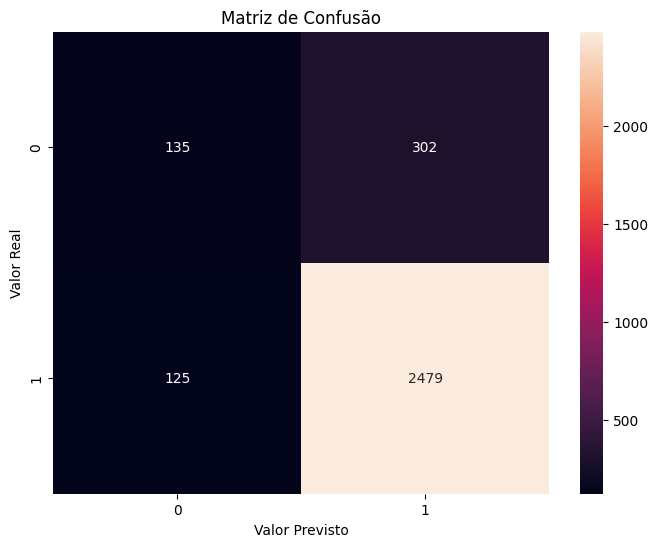


Otimizando e treinando XGBoost...
Melhores parâmetros para XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3}
Tempo de treinamento: 11.03 segundos
Avaliação do XGBoost (Estratégia de preparação: media):
Acurácia: 0.8514
Precisão: 0.8805
Recall: 0.9562
F1-Score: 0.9168
AUC-ROC: 0.7077
Precisão_Classe_0: 0.4648
Recall_Classe_0: 0.2265
F1-Score_Classe_0: 0.3046
Precisão_Classe_1: 0.8805
Recall_Classe_1: 0.9562
F1-Score_Classe_1: 0.9168


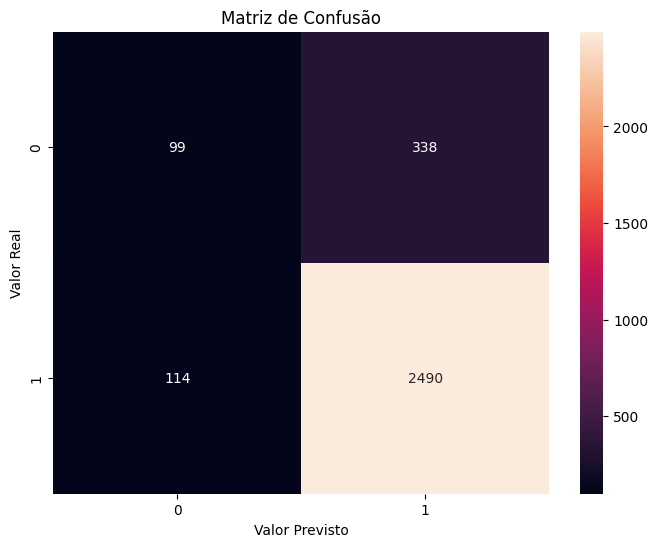


Otimizando e treinando LightGBM...
[LightGBM] [Info] Number of positive: 10414, number of negative: 10414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15550
[LightGBM] [Info] Number of data points in the train set: 20828, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

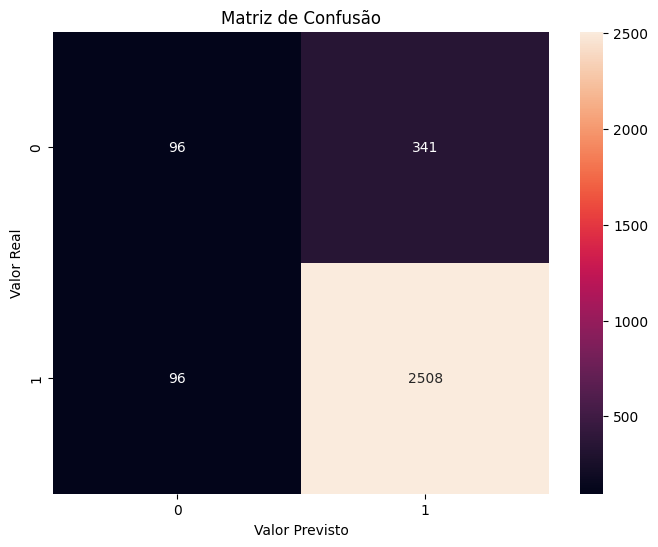


Treinando modelos com estratégia: media_pca

Otimizando e treinando Random Forest...
Melhores parâmetros para Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Tempo de treinamento: 143.12 segundos
Avaliação do Random Forest (Estratégia de preparação: media_pca):
Acurácia: 0.8395
Precisão: 0.8875
Recall: 0.9305
F1-Score: 0.9085
AUC-ROC: 0.7147
Precisão_Classe_0: 0.4180
Recall_Classe_0: 0.2975
F1-Score_Classe_0: 0.3476
Precisão_Classe_1: 0.8875
Recall_Classe_1: 0.9305
F1-Score_Classe_1: 0.9085


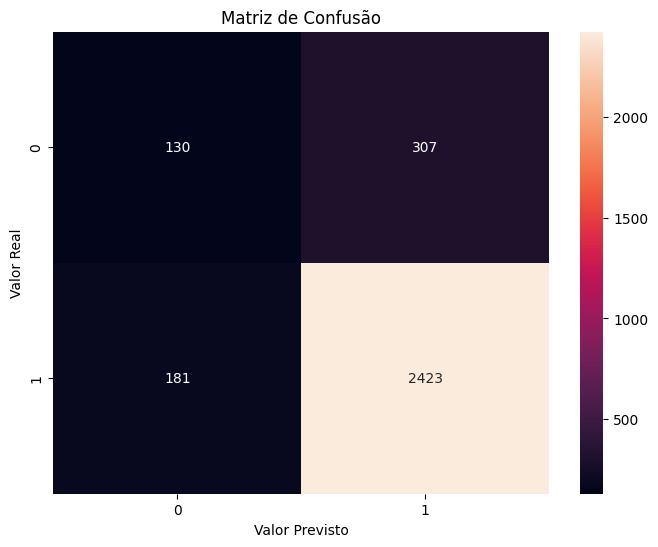


Otimizando e treinando XGBoost...
Melhores parâmetros para XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3}
Tempo de treinamento: 10.62 segundos
Avaliação do XGBoost (Estratégia de preparação: media_pca):
Acurácia: 0.7968
Precisão: 0.8864
Recall: 0.8748
F1-Score: 0.8806
AUC-ROC: 0.6807
Precisão_Classe_0: 0.3079
Recall_Classe_0: 0.3318
F1-Score_Classe_0: 0.3194
Precisão_Classe_1: 0.8864
Recall_Classe_1: 0.8748
F1-Score_Classe_1: 0.8806


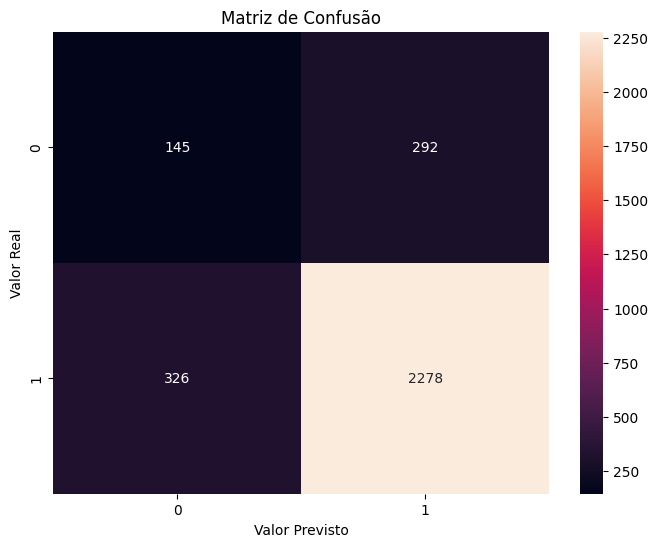


Otimizando e treinando LightGBM...
[LightGBM] [Info] Number of positive: 10414, number of negative: 10414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003957 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11475
[LightGBM] [Info] Number of data points in the train set: 20828, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

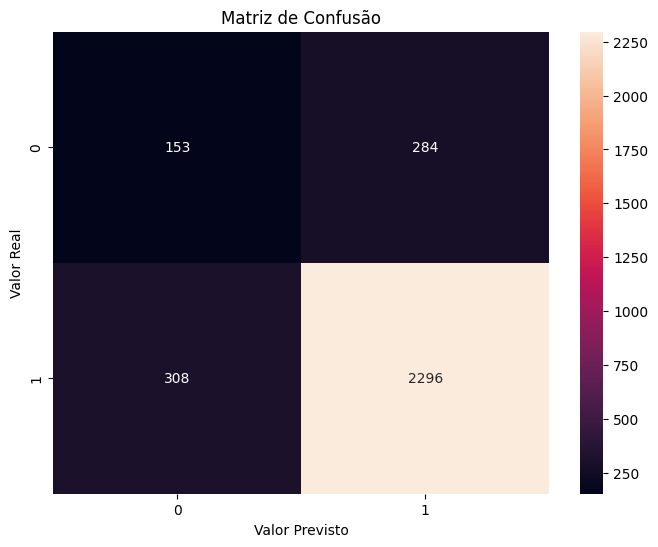


Treinando modelos com estratégia: mediana

Otimizando e treinando Random Forest...
Melhores parâmetros para Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Tempo de treinamento: 127.66 segundos
Avaliação do Random Forest (Estratégia de preparação: mediana):
Acurácia: 0.8576
Precisão: 0.8915
Recall: 0.9493
F1-Score: 0.9195
AUC-ROC: 0.7516
Precisão_Classe_0: 0.5075
Recall_Classe_0: 0.3112
F1-Score_Classe_0: 0.3858
Precisão_Classe_1: 0.8915
Recall_Classe_1: 0.9493
F1-Score_Classe_1: 0.9195


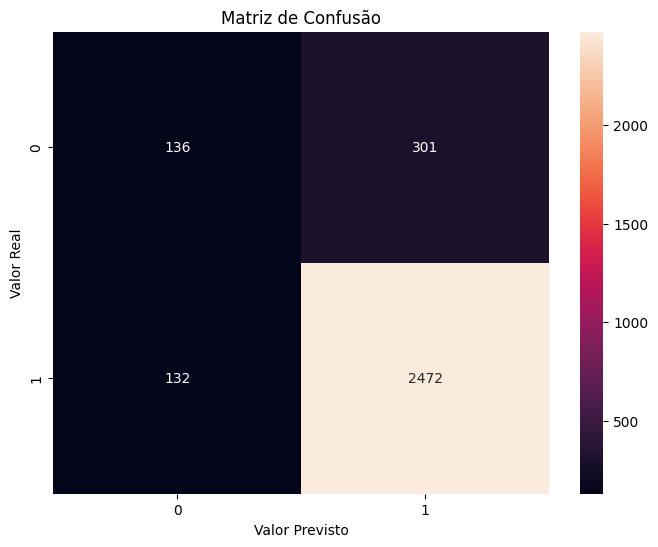


Otimizando e treinando XGBoost...
Melhores parâmetros para XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3}
Tempo de treinamento: 10.90 segundos
Avaliação do XGBoost (Estratégia de preparação: mediana):
Acurácia: 0.8494
Precisão: 0.8813
Recall: 0.9524
F1-Score: 0.9155
AUC-ROC: 0.6955
Precisão_Classe_0: 0.4537
Recall_Classe_0: 0.2357
F1-Score_Classe_0: 0.3102
Precisão_Classe_1: 0.8813
Recall_Classe_1: 0.9524
F1-Score_Classe_1: 0.9155


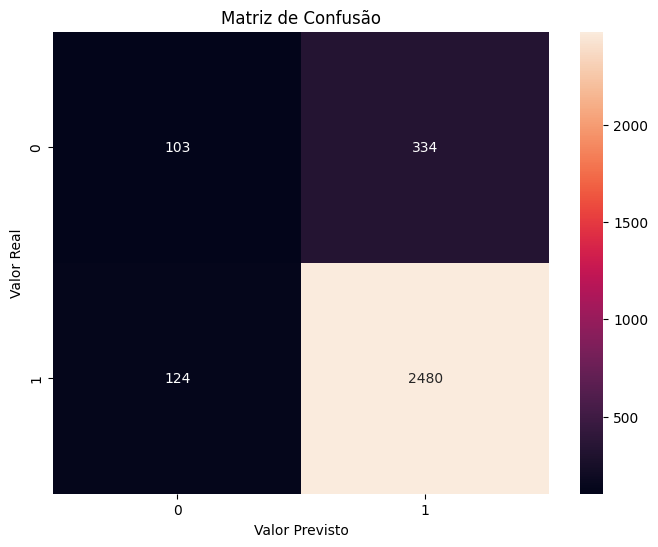


Otimizando e treinando LightGBM...
[LightGBM] [Info] Number of positive: 10414, number of negative: 10414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15549
[LightGBM] [Info] Number of data points in the train set: 20828, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

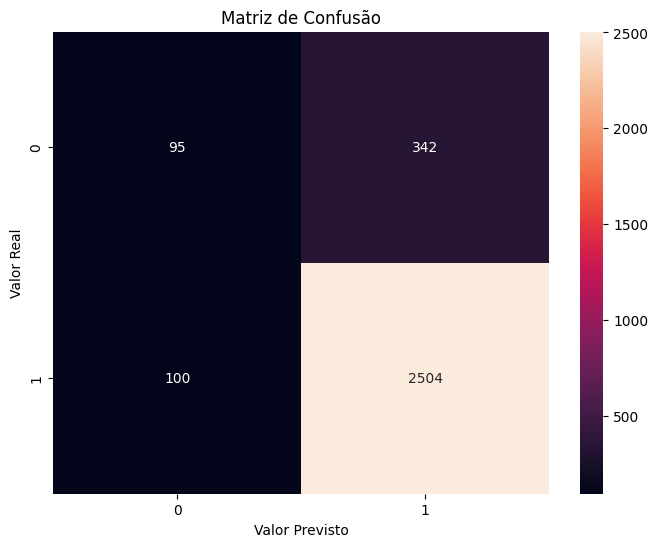


Treinando modelos com estratégia: mediana_pca

Otimizando e treinando Random Forest...
Melhores parâmetros para Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Tempo de treinamento: 143.66 segundos
Avaliação do Random Forest (Estratégia de preparação: mediana_pca):
Acurácia: 0.8313
Precisão: 0.8834
Recall: 0.9251
F1-Score: 0.9038
AUC-ROC: 0.7183
Precisão_Classe_0: 0.3790
Recall_Classe_0: 0.2723
F1-Score_Classe_0: 0.3169
Precisão_Classe_1: 0.8834
Recall_Classe_1: 0.9251
F1-Score_Classe_1: 0.9038


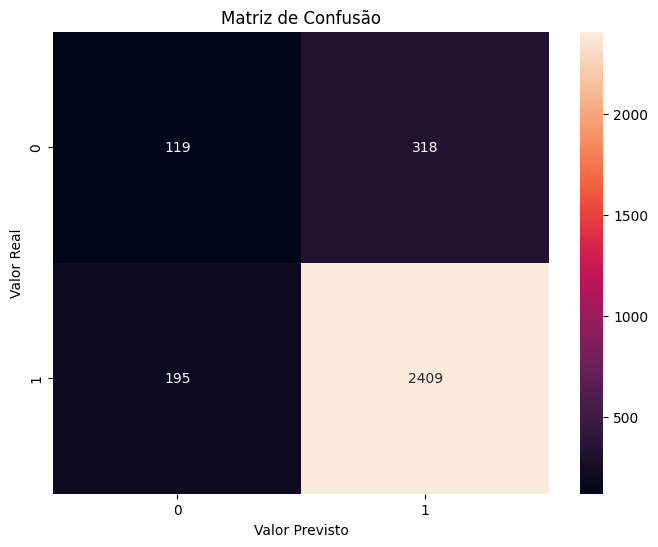


Otimizando e treinando XGBoost...
Melhores parâmetros para XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3}
Tempo de treinamento: 10.34 segundos
Avaliação do XGBoost (Estratégia de preparação: mediana_pca):
Acurácia: 0.8043
Precisão: 0.8871
Recall: 0.8840
F1-Score: 0.8856
AUC-ROC: 0.6806
Precisão_Classe_0: 0.3229
Recall_Classe_0: 0.3295
F1-Score_Classe_0: 0.3262
Precisão_Classe_1: 0.8871
Recall_Classe_1: 0.8840
F1-Score_Classe_1: 0.8856


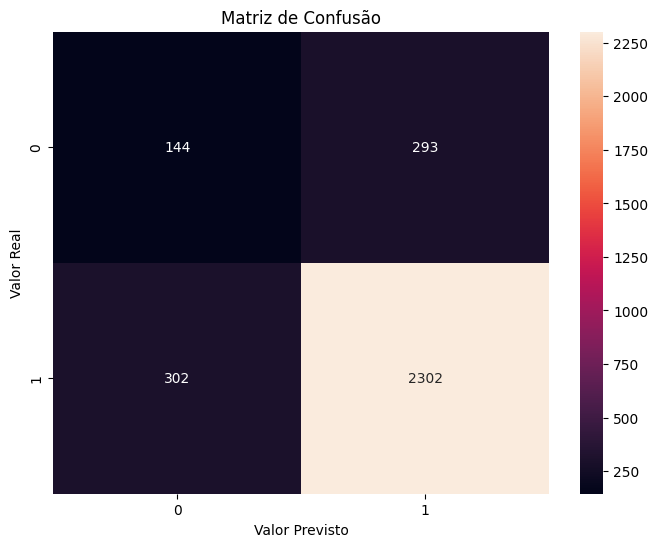


Otimizando e treinando LightGBM...
[LightGBM] [Info] Number of positive: 10414, number of negative: 10414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11475
[LightGBM] [Info] Number of data points in the train set: 20828, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

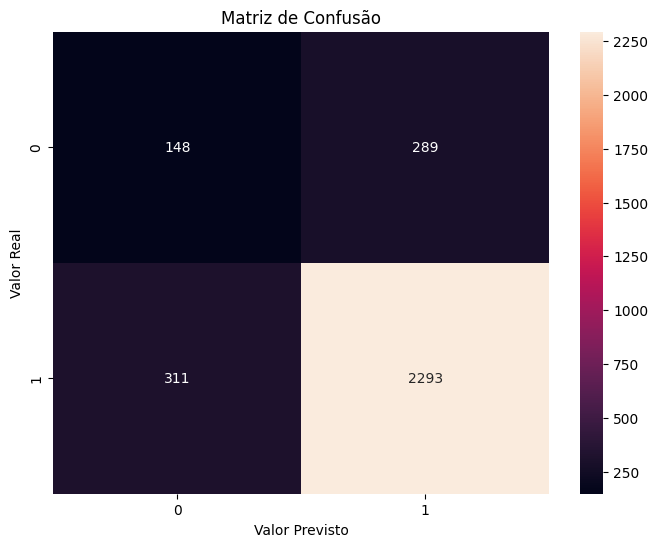


Treinando modelos com estratégia: moda

Otimizando e treinando Random Forest...
Melhores parâmetros para Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Tempo de treinamento: 118.41 segundos
Avaliação do Random Forest (Estratégia de preparação: moda):
Acurácia: 0.8547
Precisão: 0.8971
Recall: 0.9378
F1-Score: 0.9170
AUC-ROC: 0.7631
Precisão_Classe_0: 0.4922
Recall_Classe_0: 0.3593
F1-Score_Classe_0: 0.4153
Precisão_Classe_1: 0.8971
Recall_Classe_1: 0.9378
F1-Score_Classe_1: 0.9170


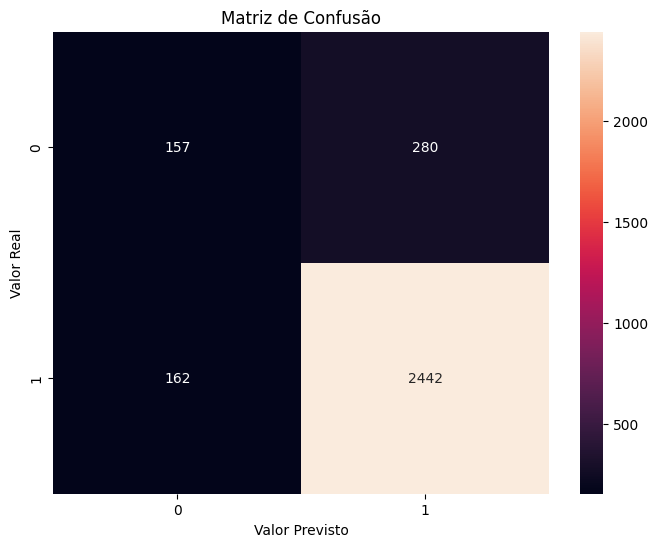


Otimizando e treinando XGBoost...
Melhores parâmetros para XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3}
Tempo de treinamento: 11.27 segundos
Avaliação do XGBoost (Estratégia de preparação: moda):
Acurácia: 0.8510
Precisão: 0.8826
Recall: 0.9528
F1-Score: 0.9163
AUC-ROC: 0.7152
Precisão_Classe_0: 0.4652
Recall_Classe_0: 0.2449
F1-Score_Classe_0: 0.3208
Precisão_Classe_1: 0.8826
Recall_Classe_1: 0.9528
F1-Score_Classe_1: 0.9163


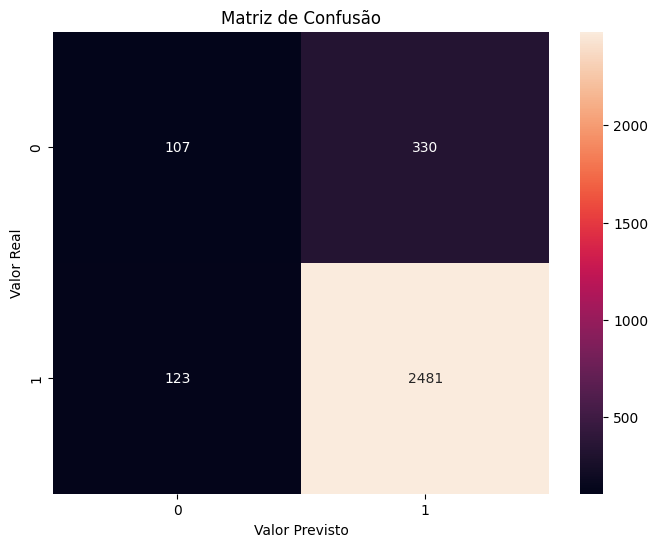


Otimizando e treinando LightGBM...
[LightGBM] [Info] Number of positive: 10414, number of negative: 10414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15549
[LightGBM] [Info] Number of data points in the train set: 20828, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Melhores parâmetros para LightGBM: {'num_leaves': 50, 'n_estimators': 200, 'max_depth': -1, 'learning_rate': 0.1}
Tempo de treinamento: 13.40 segundos
Avaliação do LightGBM (Estratégia de preparação: moda):
Acurácia: 0.8642
Precisão: 0.8845
Recall: 0.9677
F1-Score: 0.9243
AUC-ROC: 0.7535
Precisão_Classe_0: 0.5625
Recall_Classe_0: 0.2471
F1-Score_Classe_0: 0.3434
Precisão_Classe_1: 0.8845
Recall_Classe_1: 0.9677
F1-Score_Classe_1: 0.9243


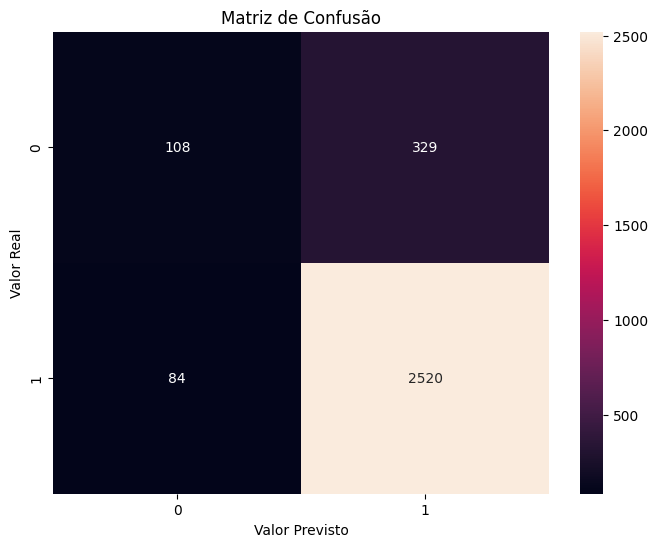


Treinando modelos com estratégia: moda_pca

Otimizando e treinando Random Forest...
Melhores parâmetros para Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Tempo de treinamento: 140.72 segundos
Avaliação do Random Forest (Estratégia de preparação: moda_pca):
Acurácia: 0.8369
Precisão: 0.8875
Recall: 0.9270
F1-Score: 0.9068
AUC-ROC: 0.7245
Precisão_Classe_0: 0.4081
Recall_Classe_0: 0.2998
F1-Score_Classe_0: 0.3456
Precisão_Classe_1: 0.8875
Recall_Classe_1: 0.9270
F1-Score_Classe_1: 0.9068


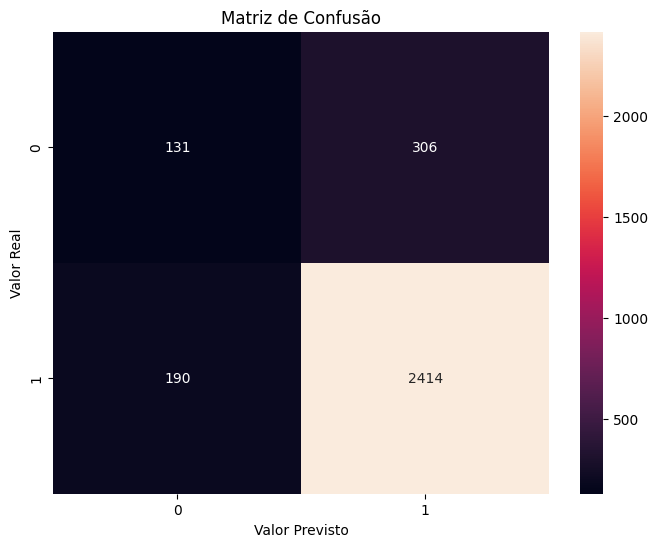


Otimizando e treinando XGBoost...
Melhores parâmetros para XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3}
Tempo de treinamento: 10.69 segundos
Avaliação do XGBoost (Estratégia de preparação: moda_pca):
Acurácia: 0.8014
Precisão: 0.8922
Recall: 0.8737
F1-Score: 0.8828
AUC-ROC: 0.6893
Precisão_Classe_0: 0.3299
Recall_Classe_0: 0.3707
F1-Score_Classe_0: 0.3491
Precisão_Classe_1: 0.8922
Recall_Classe_1: 0.8737
F1-Score_Classe_1: 0.8828


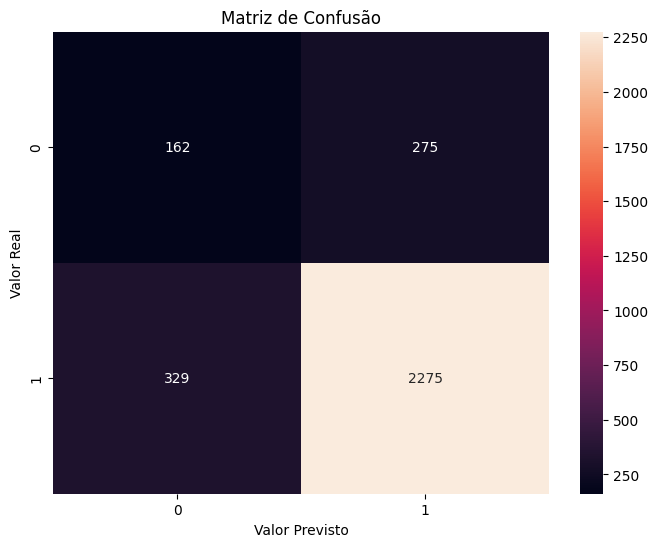


Otimizando e treinando LightGBM...
[LightGBM] [Info] Number of positive: 10414, number of negative: 10414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11475
[LightGBM] [Info] Number of data points in the train set: 20828, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

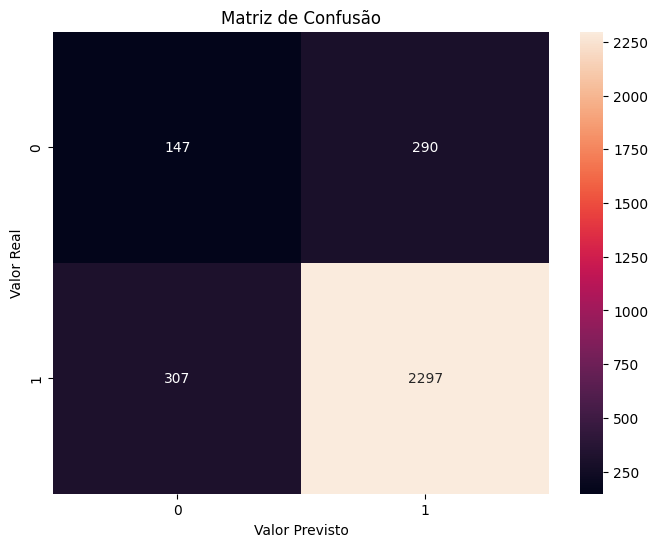


Treinando modelos com estratégia: constante

Otimizando e treinando Random Forest...
Melhores parâmetros para Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Tempo de treinamento: 116.87 segundos
Avaliação do Random Forest (Estratégia de preparação: constante):
Acurácia: 0.8477
Precisão: 0.8946
Recall: 0.9320
F1-Score: 0.9129
AUC-ROC: 0.7611
Precisão_Classe_0: 0.4604
Recall_Classe_0: 0.3455
F1-Score_Classe_0: 0.3948
Precisão_Classe_1: 0.8946
Recall_Classe_1: 0.9320
F1-Score_Classe_1: 0.9129


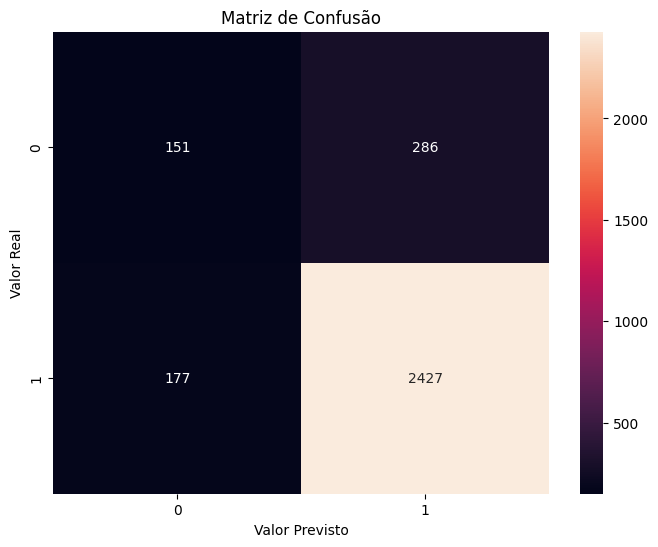


Otimizando e treinando XGBoost...
Melhores parâmetros para XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3}
Tempo de treinamento: 12.12 segundos
Avaliação do XGBoost (Estratégia de preparação: constante):
Acurácia: 0.8500
Precisão: 0.8825
Recall: 0.9516
F1-Score: 0.9157
AUC-ROC: 0.7126
Precisão_Classe_0: 0.4592
Recall_Classe_0: 0.2449
F1-Score_Classe_0: 0.3194
Precisão_Classe_1: 0.8825
Recall_Classe_1: 0.9516
F1-Score_Classe_1: 0.9157


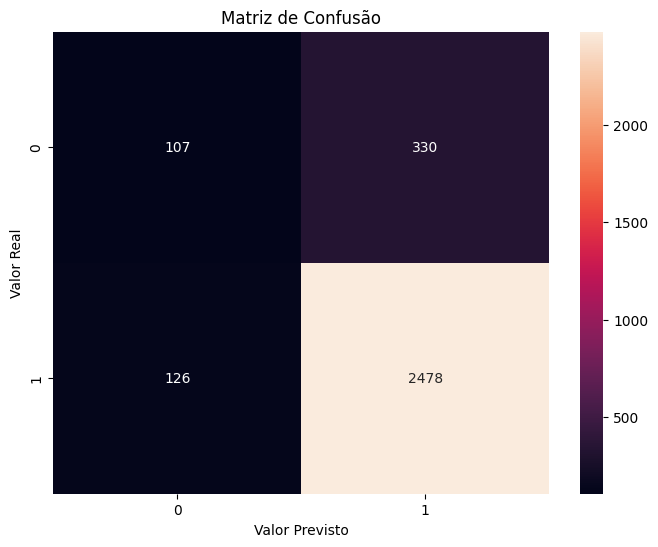


Otimizando e treinando LightGBM...
[LightGBM] [Info] Number of positive: 10414, number of negative: 10414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15551
[LightGBM] [Info] Number of data points in the train set: 20828, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

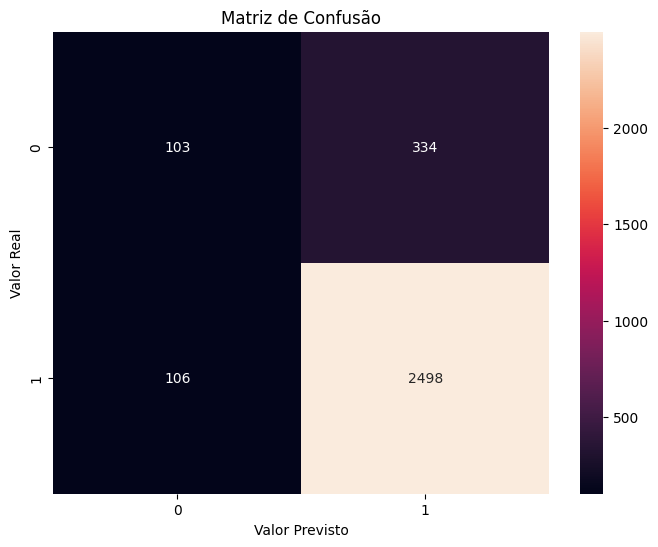


Treinando modelos com estratégia: constante_pca

Otimizando e treinando Random Forest...
Melhores parâmetros para Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Tempo de treinamento: 137.36 segundos
Avaliação do Random Forest (Estratégia de preparação: constante_pca):
Acurácia: 0.8343
Precisão: 0.8863
Recall: 0.9251
F1-Score: 0.9053
AUC-ROC: 0.7174
Precisão_Classe_0: 0.3963
Recall_Classe_0: 0.2929
F1-Score_Classe_0: 0.3368
Precisão_Classe_1: 0.8863
Recall_Classe_1: 0.9251
F1-Score_Classe_1: 0.9053


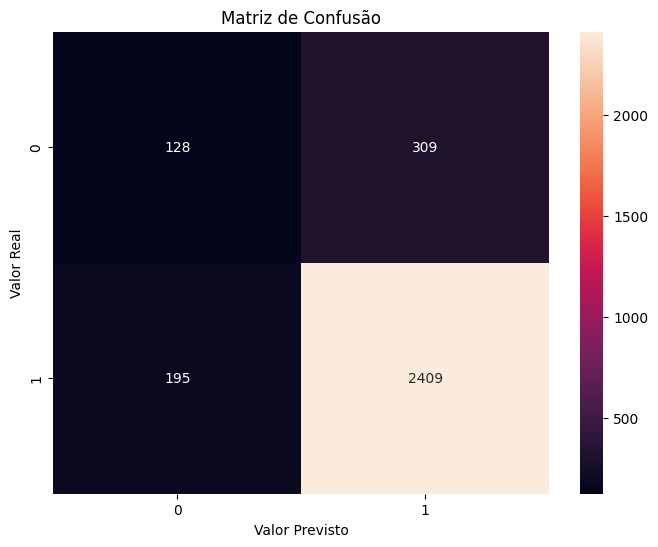


Otimizando e treinando XGBoost...
Melhores parâmetros para XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3}
Tempo de treinamento: 10.25 segundos
Avaliação do XGBoost (Estratégia de preparação: constante_pca):
Acurácia: 0.8066
Precisão: 0.8889
Recall: 0.8848
F1-Score: 0.8868
AUC-ROC: 0.6852
Precisão_Classe_0: 0.3318
Recall_Classe_0: 0.3410
F1-Score_Classe_0: 0.3363
Precisão_Classe_1: 0.8889
Recall_Classe_1: 0.8848
F1-Score_Classe_1: 0.8868


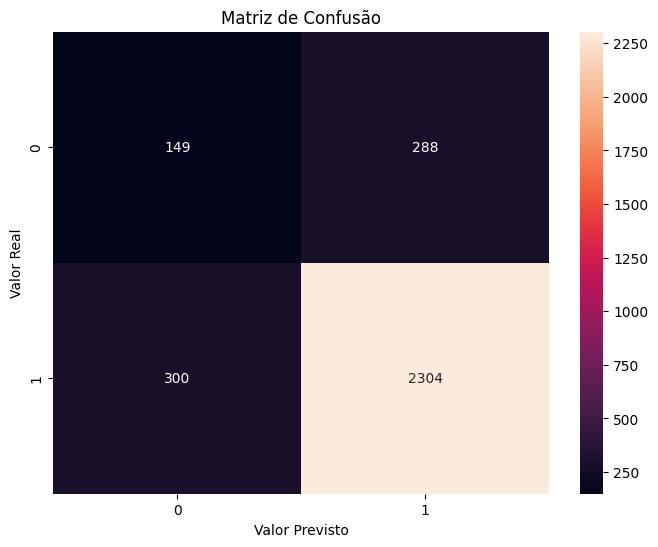


Otimizando e treinando LightGBM...
[LightGBM] [Info] Number of positive: 10414, number of negative: 10414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11475
[LightGBM] [Info] Number of data points in the train set: 20828, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

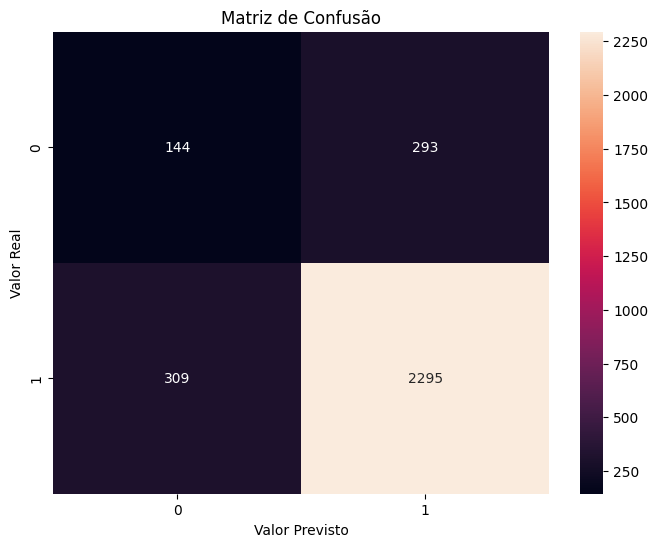


Todos os resultados foram salvos em 'resultados_modelos.parquet'


In [7]:
todos_resultados = []
modelos_treinados = {}

for estrategia, (X_train, X_test, y_train, y_test) in dados_preparados.items():
    print(f"\nTreinando modelos com estratégia: {estrategia}")
    resultados, modelos = treinar_e_avaliar(X_train, X_test, y_train, y_test, estrategia)
    todos_resultados.extend(resultados)
    modelos_treinados[estrategia] = modelos

df_todos_resultados = pd.DataFrame(todos_resultados)
df_todos_resultados.to_parquet('resultados_modelos.parquet')

print("\nTodos os resultados foram salvos em 'resultados_modelos.parquet'")

[LightGBM] [Info] Number of positive: 10414, number of negative: 10414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15549
[LightGBM] [Info] Number of data points in the train set: 20828, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Melhor modelo: LightGBM com estratégia moda
F1-Score: 0.9243


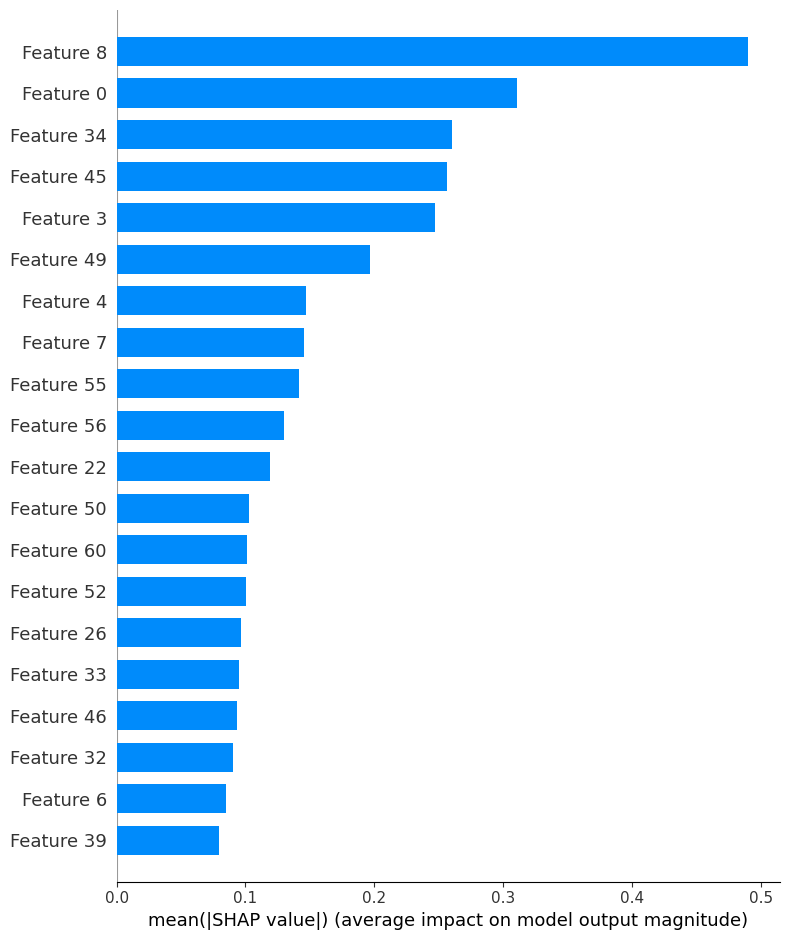

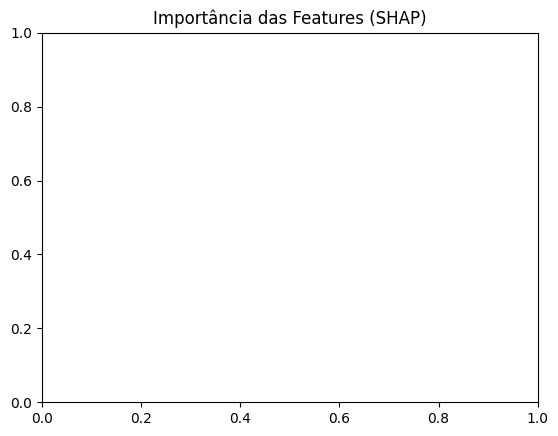

In [20]:
melhor_estrategia, melhor_nome, melhor_modelo, melhor_f1 = selecionar_melhor_modelo(todos_resultados, dados_preparados)
print(f"\nMelhor modelo: {melhor_nome} com estratégia {melhor_estrategia}")
print(f"F1-Score: {melhor_f1:.4f}")

X_test = dados_preparados[melhor_estrategia][1]
explainer = shap.TreeExplainer(melhor_modelo)
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("Importância das Features (SHAP)")
plt.show()

In [21]:
predicoes, modelo_final, y_pred_final = treinar_e_prever_modelo_final(df, test, melhor_modelo, melhor_estrategia, tratar_nulos)

print("\nPrevisões finais geradas e modelo final treinado.")


Treinando modelo final com todos os dados...
[LightGBM] [Info] Number of positive: 130181, number of negative: 130181
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15548
[LightGBM] [Info] Number of data points in the train set: 260362, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Aviso: A coluna 'id' não está presente no DataFrame de teste.
Salvando as previsões com o índice como identificador...
Previsões finais salvas em 'predicoes_finais.csv' com o índice como identificador.

Previsões finais geradas e modelo final treinado.



Testando o modelo final com o conjunto de teste...
Acurácia: 0.7934
Precisão: 0.8291
Recall: 0.9251
F1-Score: 0.8745


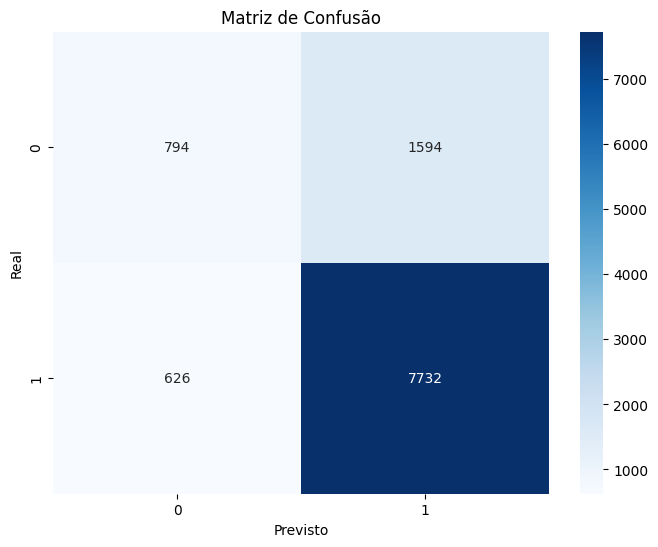


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.56      0.33      0.42      2388
           1       0.83      0.93      0.87      8358

    accuracy                           0.79     10746
   macro avg       0.69      0.63      0.65     10746
weighted avg       0.77      0.79      0.77     10746


Total de amostras: 10746
Acertos: 8526 (79.34%)
Erros: 2220 (20.66%)


In [22]:
avaliar_modelo_final(y_pred_final, test)